<a href="https://colab.research.google.com/github/HEM2058/sentinelhub_remote_sensing/blob/main/modeltesting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load dataset
print("Loading dataset...")
file_path = '/content/(1)RY_weather_dataset_with_engineered_features.csv'
data = pd.read_csv(file_path)
print("Dataset loaded successfully.")

# Select rolling mean features and target variable
print("Selecting features and target variable...")
rolling_mean_features = ['Temp_Rolling_Mean_3', 'Precip_Rolling_Mean_3']
target = 'Rice Yield (Kg per ha)'

X = data[rolling_mean_features]
y = data[target]
print("Features and target variable selected.")

# Split data into training and testing sets
print("Splitting data into training and testing sets...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Data split completed.")

# Initialize Random Forest model
print("Initializing Random Forest model...")
rf = RandomForestRegressor(random_state=42)

# Define hyperparameter grid
print("Defining hyperparameter grid...")
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Perform Grid Search with cross-validation
print("Performing Grid Search with cross-validation...")
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Grid Search completed.")

# Get the best model from Grid Search
print("Retrieving the best model from Grid Search...")
best_rf = grid_search.best_estimator_
print("Best model retrieved.")

# Make predictions
print("Making predictions on training and testing sets...")
y_pred_train = best_rf.predict(X_train)
y_pred_test = best_rf.predict(X_test)
print("Predictions completed.")

# Evaluate model
print("Evaluating model performance...")
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Training MSE: {train_mse}, R2: {train_r2}")
print(f"Testing MSE: {test_mse}, R2: {test_r2}")

# Feature importance plot (though we have only two features)
print("Plotting feature importances...")
plt.figure(figsize=(10, 8))
plt.barh(rolling_mean_features, best_rf.feature_importances_)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from Random Forest')
plt.show()



Loading dataset...
Dataset loaded successfully.
Selecting features and target variable...
Features and target variable selected.
Splitting data into training and testing sets...
Data split completed.
Initializing Random Forest model...
Defining hyperparameter grid...
Performing Grid Search with cross-validation...
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
864 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
864 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 345, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 584, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local/lib/python3.10/dist-packages/

ValueError: Input X contains NaN.
RandomForestRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

Loading dataset...
Dataset loaded successfully.
Selecting features and target variable...
Features and target variable selected.
Handling missing values...
Missing values handled.
Splitting data into training and testing sets...
Data split completed.
Initializing Random Forest model...
Defining hyperparameter grid...
Performing Grid Search with cross-validation...
Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Grid Search completed.
Retrieving the best model from Grid Search...
Best model retrieved.
Making predictions on training and testing sets...
Predictions completed.
Evaluating model performance...
Training MSE: 620436.6106539662, R2: 0.34240805881835434
Testing MSE: 816217.0395942292, R2: 0.20730901503360966
Plotting feature importances...


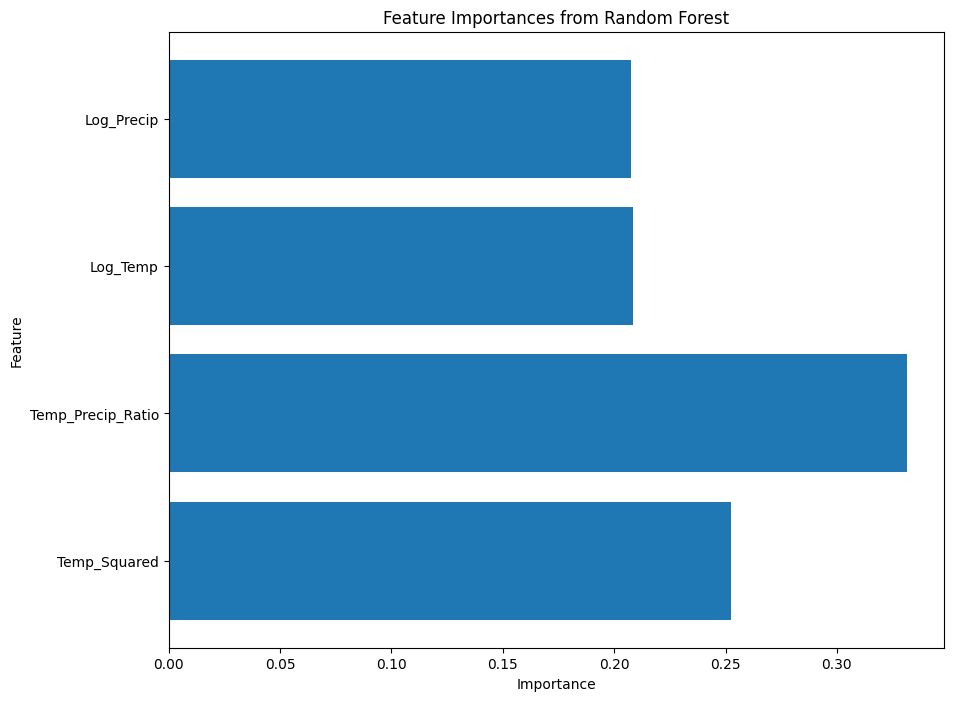

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Load dataset
print("Loading dataset...")
file_path = '/content/(1)RY_weather_dataset_with_engineered_features.csv'
data = pd.read_csv(file_path)
print("Dataset loaded successfully.")

# Select rolling mean features and target variable
print("Selecting features and target variable...")
rolling_mean_features = ['Temp_Squared', 'Temp_Precip_Ratio','Log_Temp', 'Log_Precip']
target = 'Rice Yield (Kg per ha)'

X = data[rolling_mean_features]
y = data[target]
print("Features and target variable selected.")

# Handle missing values by imputing
print("Handling missing values...")
imputer_X = SimpleImputer(strategy='mean')
X = imputer_X.fit_transform(X)

imputer_y = SimpleImputer(strategy='mean')
y = imputer_y.fit_transform(y.values.reshape(-1, 1)).ravel()
print("Missing values handled.")

# Split data into training and testing sets
print("Splitting data into training and testing sets...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Data split completed.")

# Initialize Random Forest model
print("Initializing Random Forest model...")
rf = RandomForestRegressor(random_state=42)

# Define hyperparameter grid
print("Defining hyperparameter grid...")
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Perform Grid Search with cross-validation
print("Performing Grid Search with cross-validation...")
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Grid Search completed.")

# Get the best model from Grid Search
print("Retrieving the best model from Grid Search...")
best_rf = grid_search.best_estimator_
print("Best model retrieved.")

# Make predictions
print("Making predictions on training and testing sets...")
y_pred_train = best_rf.predict(X_train)
y_pred_test = best_rf.predict(X_test)
print("Predictions completed.")

# Evaluate model
print("Evaluating model performance...")
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Training MSE: {train_mse}, R2: {train_r2}")
print(f"Testing MSE: {test_mse}, R2: {test_r2}")

# Feature importance plot (though we have only two features)
print("Plotting feature importances...")
plt.figure(figsize=(10, 8))
plt.barh(rolling_mean_features, best_rf.feature_importances_)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from Random Forest')
plt.show()
